# Q10

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, util, filters
from skimage.io import imread, imshow
from skimage.util import img_as_ubyte, img_as_float, pad
from skimage.color import rgb2gray
from scipy.ndimage.filters import convolve

# Part 1

In [47]:
def bilateral_filtering(im, window, s_r, s_d):
    
    new_im = np.zeros(im.shape)
    padding = int((window - 1)/2)
    im = pad(im, padding, mode='constant')
    
    X, Y = np.meshgrid(range(-padding, padding + 1), range(-padding, padding + 1))
    domain_filter = np.exp(-(X ** 2 + Y ** 2)/(2 * s_d ** 2))
    
    for i in range(padding, im.shape[0] - padding):
        for j in range(padding, im.shape[1] - padding):
            
            i_low = i - padding
            i_high = i + padding + 1
            j_low = j - padding
            j_high = j + padding + 1
            im_window = im[i_low:i_high, j_low:j_high]
            
            bilateral_filter = np.multiply(np.exp(-((im_window - im[i, j]) ** 2)/(2 * (s_r ** 2))), domain_filter)
            
            bilateral_filter = bilateral_filter / np.sum(bilateral_filter)
            bilateral_temp = np.multiply(bilateral_filter, im_window)
                                           
            new_im[i_low, j_low] = np.sum(bilateral_temp)
            
    return new_im

In [48]:
face = imread('./A2_resources/face.jpg')
face = rgb2gray(face)
res_face = bilateral_filtering(face, 31, 0.05, 10)
res_face = img_as_ubyte(res_face)

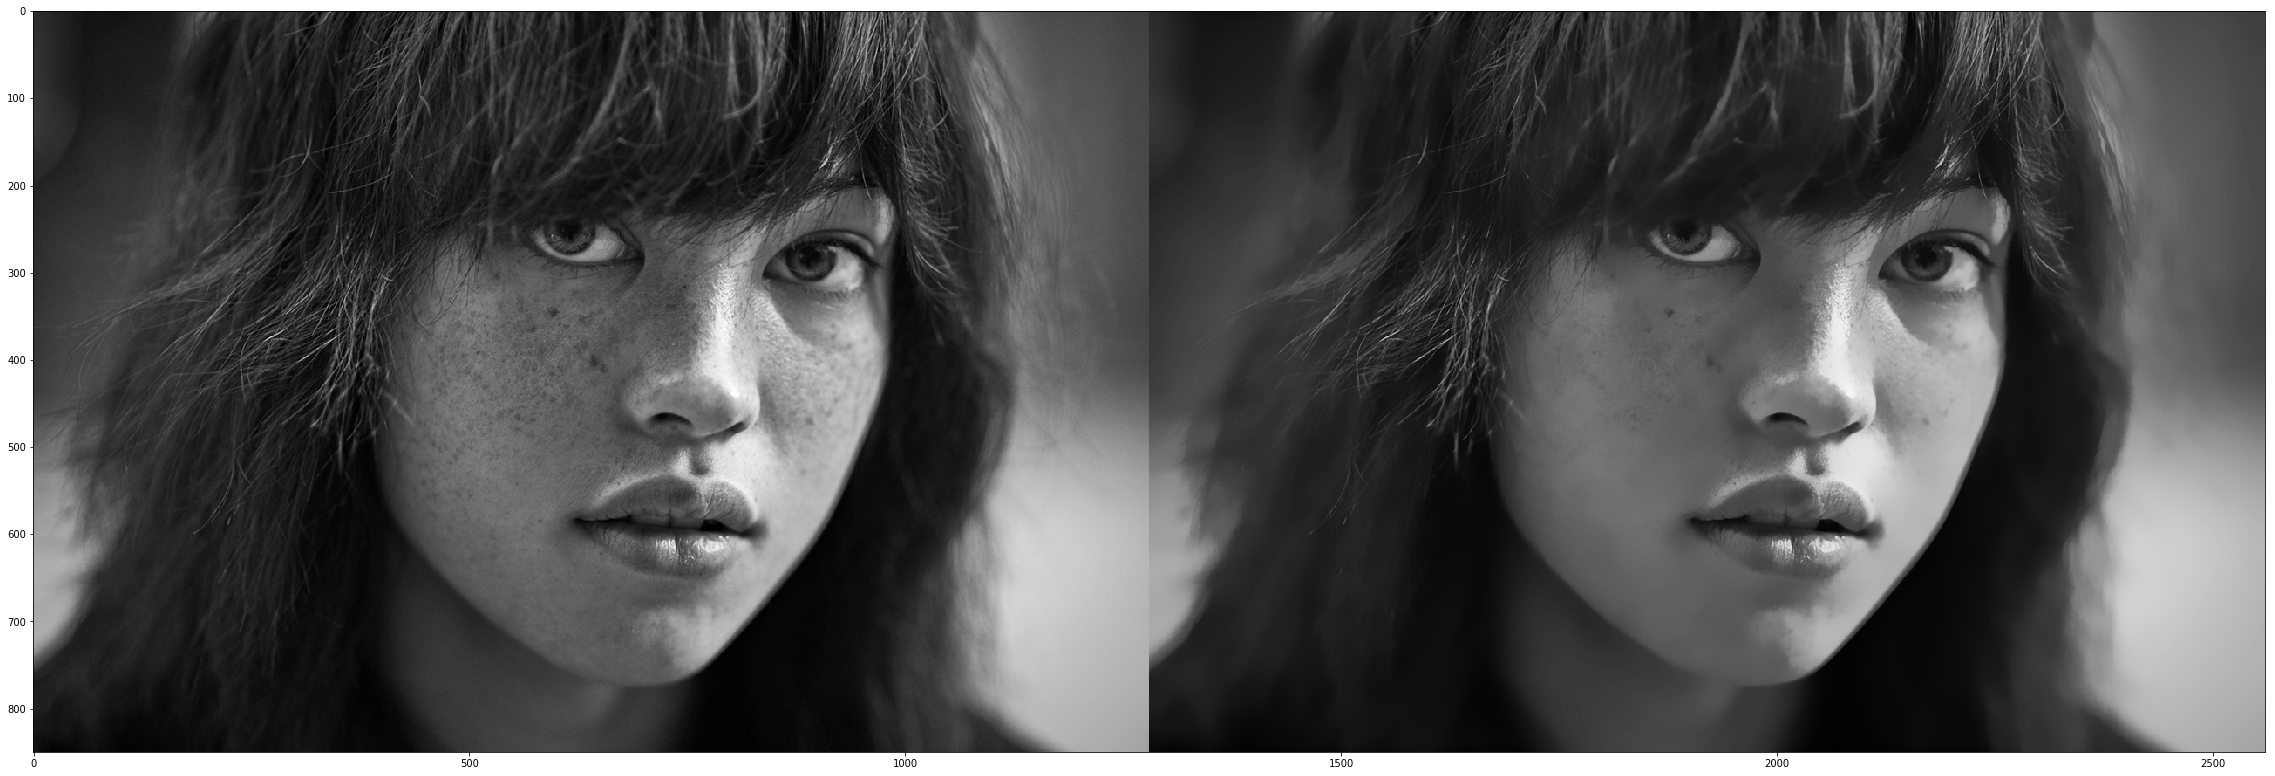

In [49]:
plt.figure(figsize=(40,40))
temp_face = np.hstack((img_as_ubyte(face), res_face))
plt.imshow(temp_face, cmap='gray')

# Part 2

12


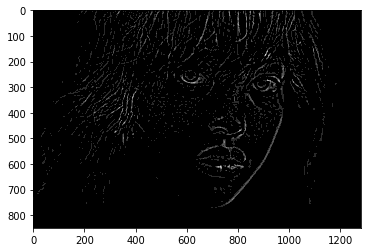

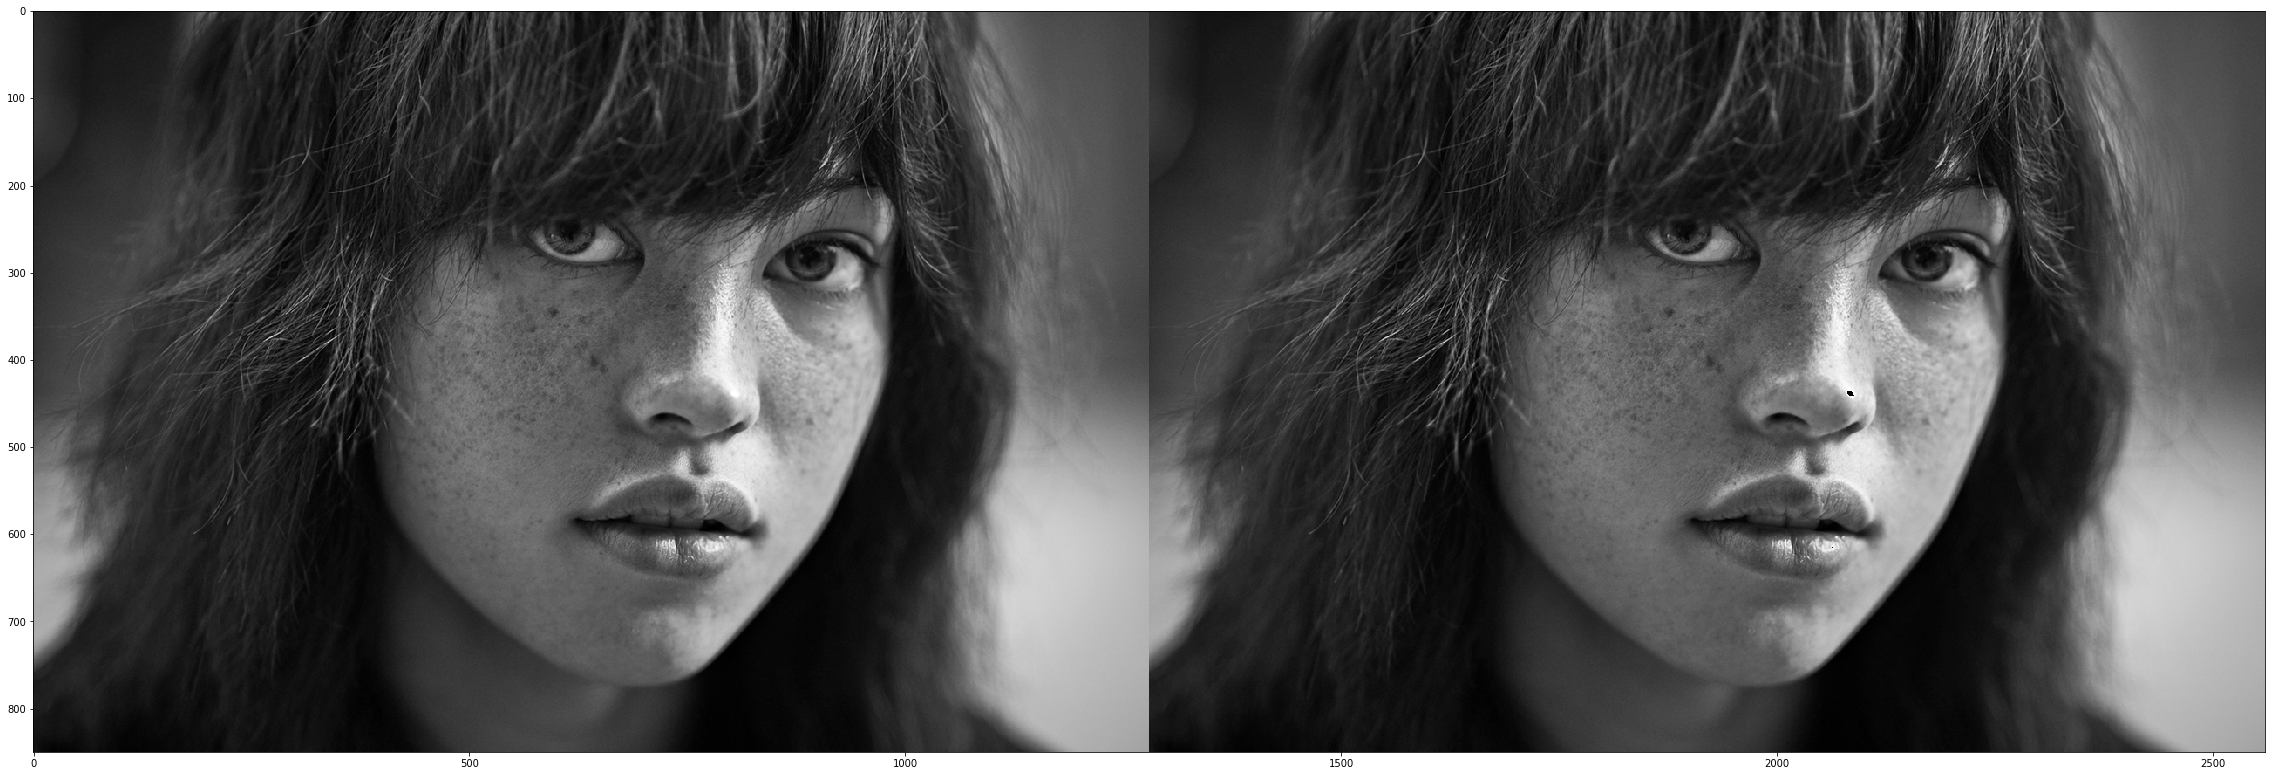

In [45]:
hb_fil = np.array([[-2, -2, -2], [-2, 8 * 2 + 1, -2], [-2, -2, -2]])
face = img_as_ubyte(rgb2gray(imread('./A2_resources/face.jpg')))
hp = filters.laplace(filters.gaussian(face, sigma=3))
hp = img_as_ubyte(hp)
highboost = face + 2 * hp
print(np.max(2 * hp))
plt.figure()
plt.imshow(hp, cmap="gray")
plt.figure(figsize=(40, 40))
plt.imshow(np.hstack((face, highboost)), cmap="gray")

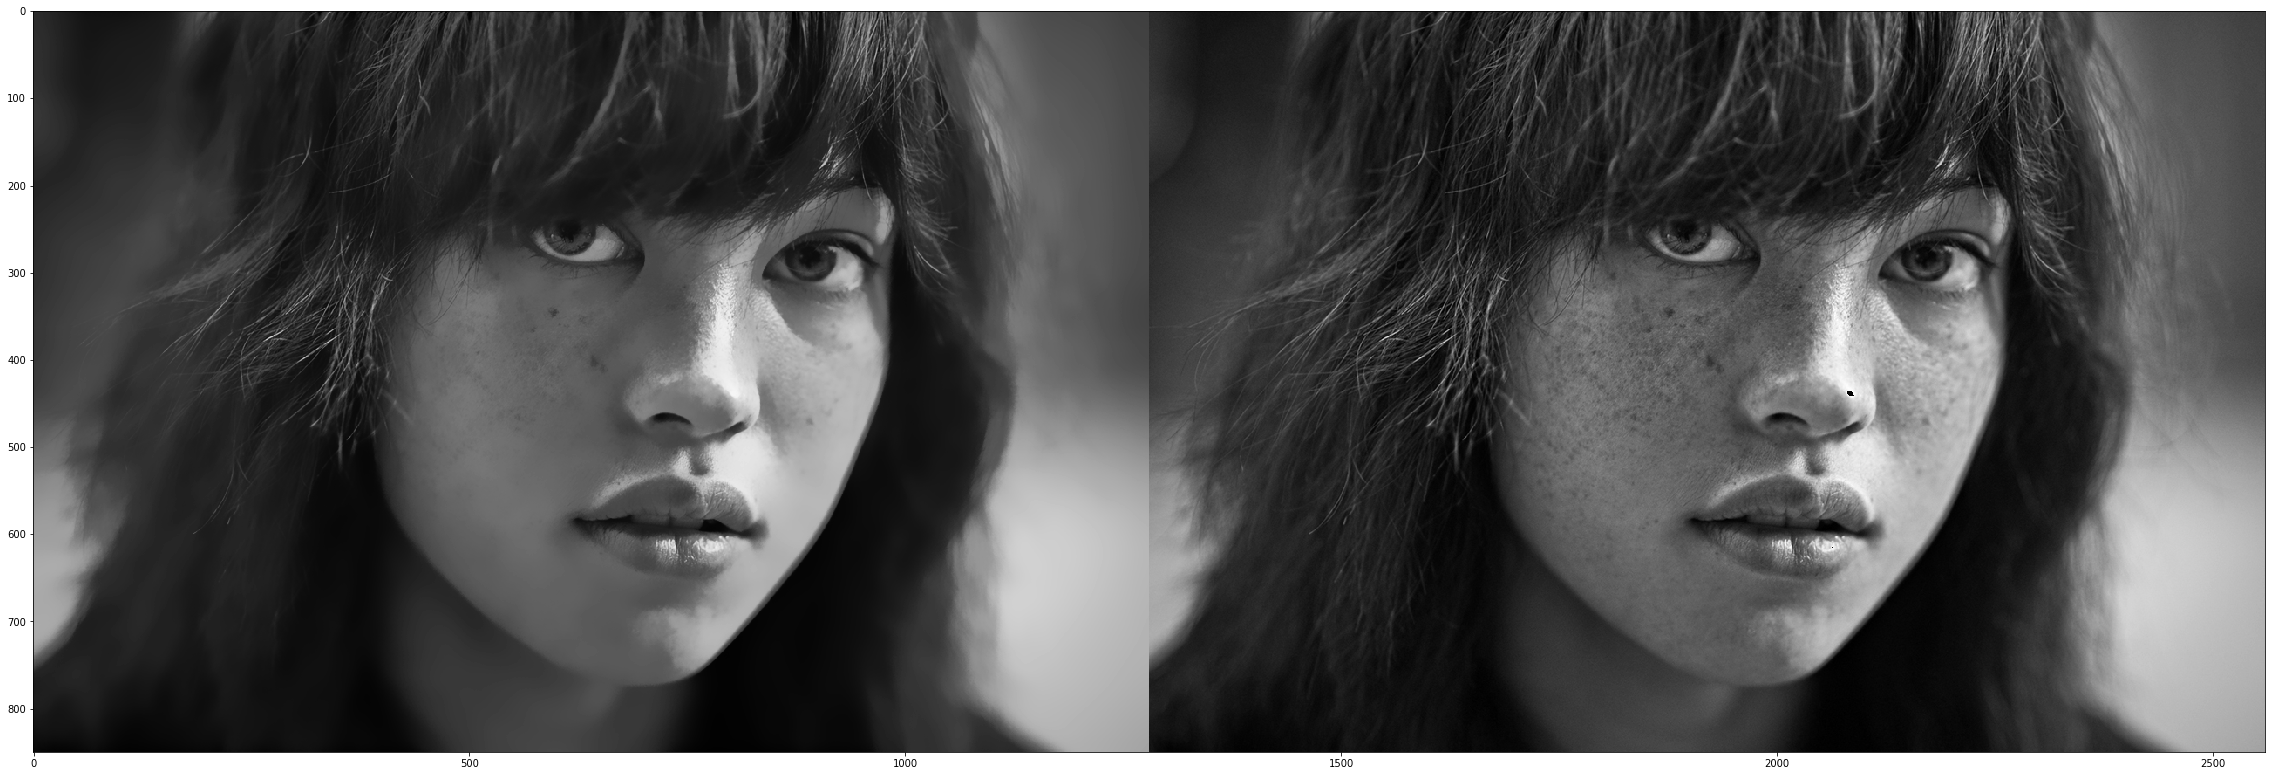

In [46]:
plt.figure(figsize=(40, 40))
temp_face = np.hstack((res_face, highboost))
plt.imshow(temp_face, cmap="gray")

### Bilateral filtering
Regions of intensity discontinuity are not smoothed. 

### High boost filtering
The intensity of regions of intensity discontinuity is enhanced.

# Part 3

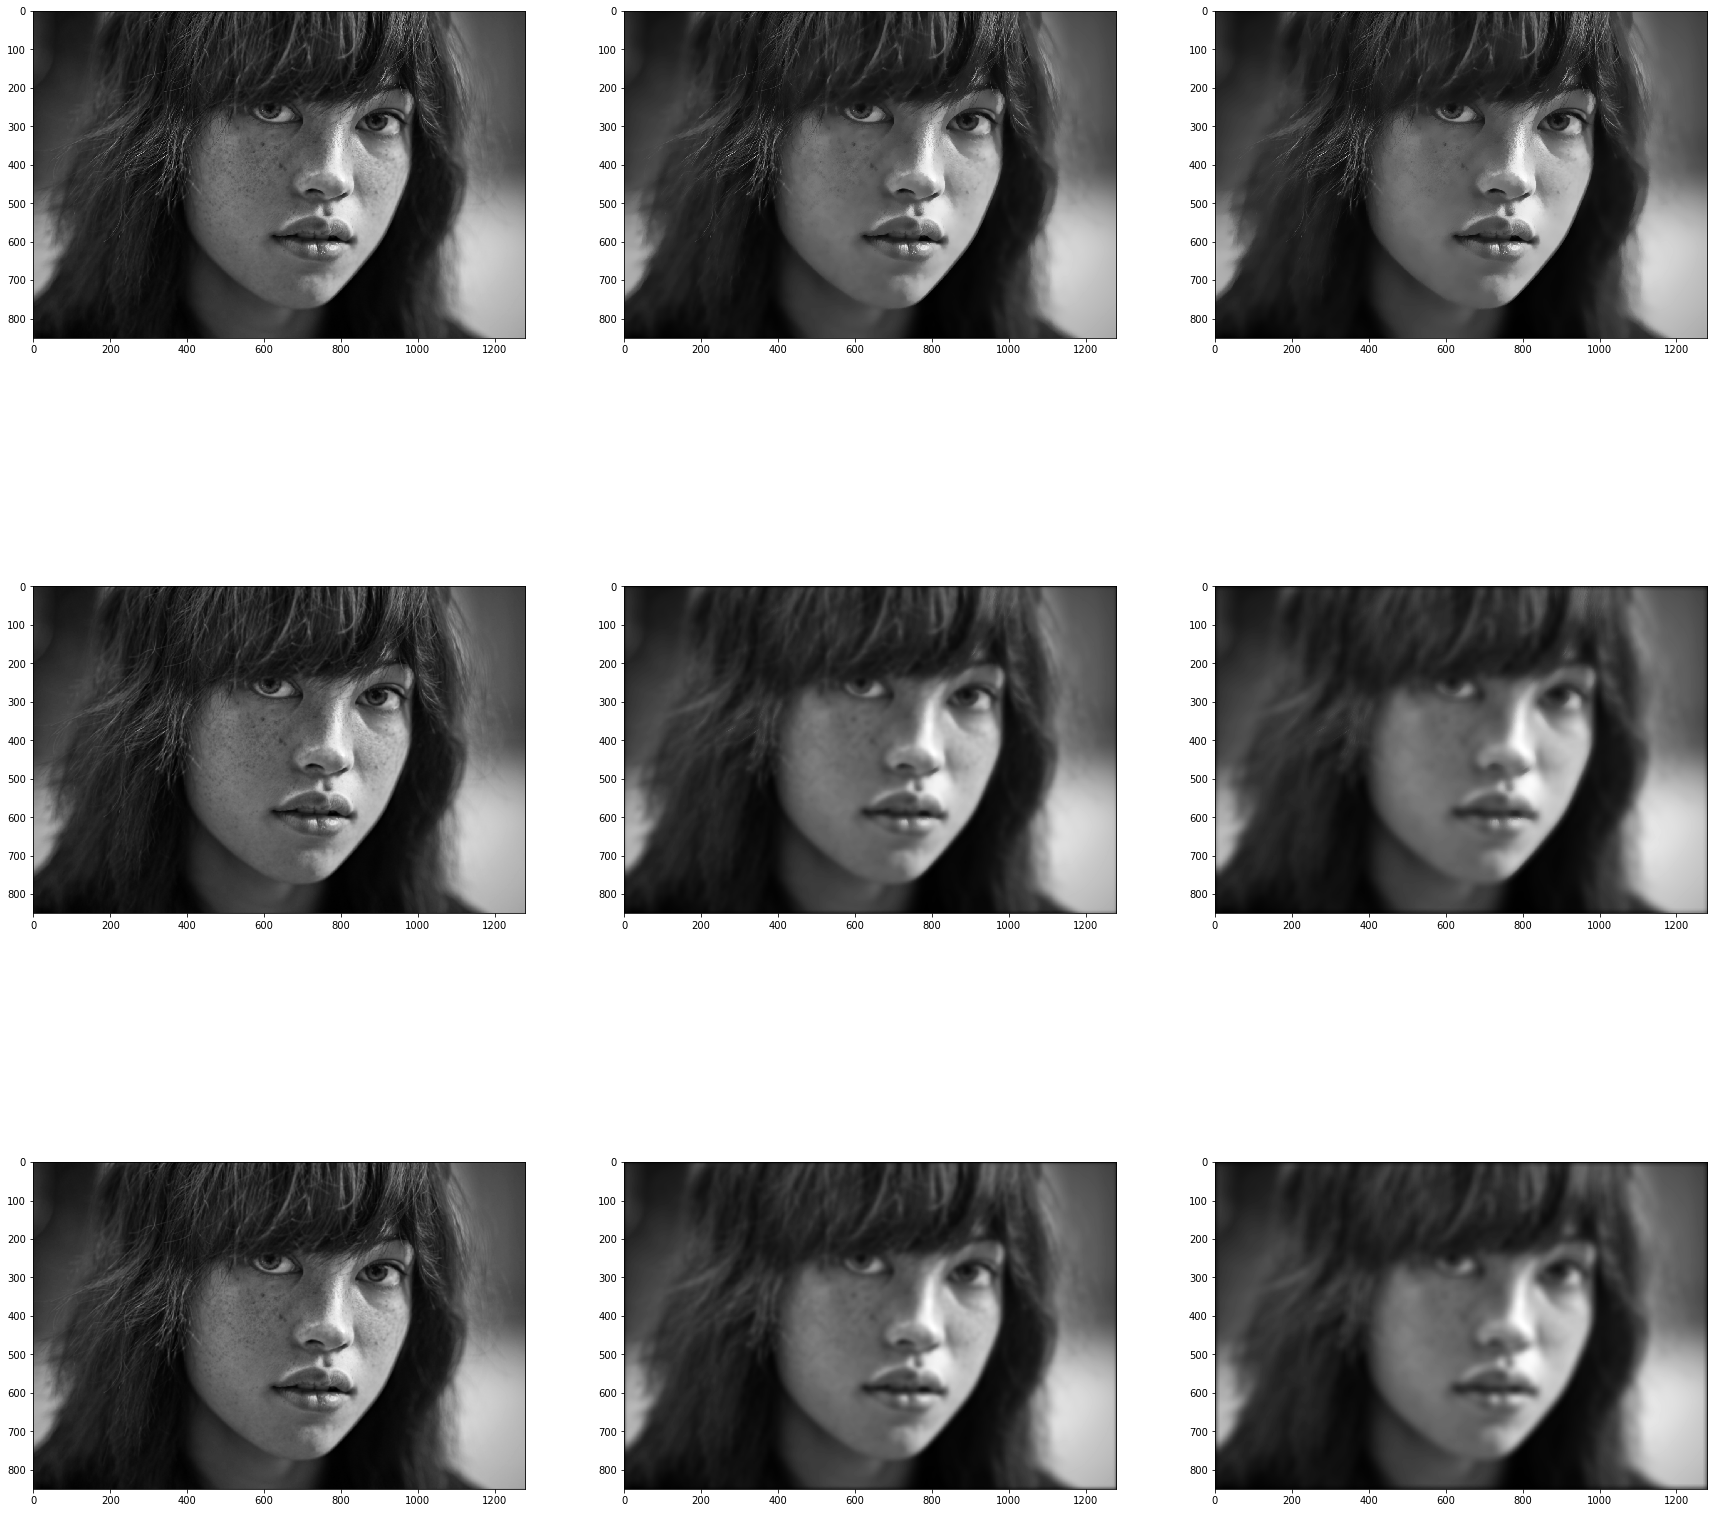

In [33]:
fig = plt.figure(figsize=(30, 30))

s_r_list = [0.05, 0.05, 0.05, 0.5, 0.5, 0.5, 5, 5, 5]
s_d_list = [1, 5, 10, 1, 5, 10, 1, 5, 10]

for _i in range(1,10):
    plt.subplot(3,3,_i)
    plt.imshow(bilateral_filtering(face, 30, s_r_list[_i-1], s_d_list[_i-1]), cmap="gray")
    print(_i)
plt.show()

As the value of sigma_r increases the Range filter's Variance increases and hence the Bilateral filter approaches a Gaussian filter. When the variance is low, the weights drop quickly as color intensity difference increases.

As the value of sigma_d increases, the Smoothing Gaussian filter becomes flatter. Pixels which are distant get higher weights. Thus, the smoothing happens over a larger area.